## 15.10 Model Preparation Challenge 

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks. Moreover, you can also submit a kernel to the Kaggle containing your solutions.

Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

First, load the dataset.

Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.



In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
import matplotlib.colors
import math 


warnings.filterwarnings('ignore')

In [133]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

lifexp_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)


## Column Descriptions
- Country= Country
- Year= Year
- Status= Developed or Developing status
- Life expectancy=Life Expectancy in age
- Adult Mortality= Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- infant deaths= Number of Infant Deaths per 1000 population
- Alcohol= Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage expenditure= Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B= Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles= Measles - number of reported cases per 1000 population
- BMI= Average Body Mass Index of entire population
- under-five deaths= Number of under-five deaths per 1000 population
- Polio= Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure= General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria= Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS= Deaths per 1 000 live births HIV/AIDS (0-4 years)
- GDP= Gross Domestic Product per capita (in USD)
- Population= Population of the country
- thinness 1-19 years= Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- thinness 5-9 years= Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources= Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling= Number of years of Schooling(years)

## Exploring and Null Values 


In [134]:
# count the zero and null values and add them to a new dataframe 

nulls = lifexp_df.isin([np.nan]).sum()
zeros = lifexp_df.isin([0]).sum()
country_zeros = lifexp_df.groupby('Country', axis = 0).agg(lambda x: x.eq(0).sum())  

#country_nulls = lifexp_df.groupby('Country', axis = 0).agg(lambda x: (np.nansum(x)== False).sum)  

country_nulls = lifexp_df.groupby('Country', axis = 0).agg(lambda x: x.isnull().sum())  

#country_nulls = lifexp_df.groupby('Country', axis = 0).agg(lambda x: x.eq(np.nan).sum())  

null_df =  pd.DataFrame()
null_df['nulls'] = nulls
null_df['zeros'] = zeros

#transpose dataframe 
null_df = null_df.T
#add null and zero counts for 
#null_df = null_df.append(country_nulls)
null_df = null_df.append(country_zeros)

# sort dataframe to find countries with a high number of zeros or missing values
# 'Adult Mortality',  'Alcohol', 'Hepatitis B',  'Total expenditure', 'Diphtheria ', 'GDP', 'Population', 'Income composition of resources', 'Schooling']
#' BMI ', 'Polio','Life expectancy ','Adult Mortality', ' thinness  1-19 years', ' thinness 5-9 years'
null_df = null_df.sort_values(by=['Schooling'],ascending=False )

#pd.set_option(optname, val)
null_df.head()

# to assist in viewing use the Heatmap below 
#plt.figure(figsize=(40,40))
#sns.heatmap(null_df)
#country_zeros.head()


,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Alcohol,Country,Diphtheria,GDP,Hepatitis B,...,Measles,Polio,Population,Schooling,Status,Total expenditure,Year,infant deaths,percentage expenditure,under-five deaths
nulls,34.0,0.0,34.0,34.0,10.0,194.0,0.0,19.0,448.0,553.0,...,0,19.0,652.0,163.0,0,226.0,0,0,0.0,0
zeros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,983,0.0,0.0,28.0,0,0.0,0,848,611.0,785
South Sudan,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,11,0.0,0.0,11.0,0,0.0,0,0,13.0,0
Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,16,0.0,0.0,6.0,0,0.0,0,16,1.0,16
Montenegro,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,14,0.0,0.0,4.0,0,0.0,0,16,1.0,16


When examining the null values, the table shows a high number of null values >100 in GDP, HepB, population, schooling, income composition of reasources, and total expenditure. With a few missing <35 values in body mass index, thinness, diptheria, life expectancy, adult mortality, and polio.
A large number of countries are not reporting GDP per capita at all. This is likely because they do not have complete economic and census data for their country.  Other countries intermitently report it, which is likely due to conflicts, disasters, or because of the country being recently formed. I will likely have to impute this data because many of the countries are missing values for every year making it difficult to interpolate.  

In examining the columns with zeros, income composition of resources has a large number of zero values, this is likely explained by clerical errors, a lack of or mis-reporting by that country or countries being recently formed(such as  South Sudan). Schooling likely shows zeros for similar reasons. These values will  be treated as outliers and winsorized. Deaths Under Five per 1000, its not surprising that many of these values are so frequently zero because many countries have low populations, small developed countries with descent health care and social services are likely less likely to have their children in perril. While larger developing countries appear to have the highest values for this statistic. Measles likley has a large number of zeros for similar reasons. 



In [135]:
#create column list for imputation
columnlist = [ 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 
                  'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
                  'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
                  ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
                  ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

#impute the column mean for each missing value 
for column in columnlist:
    lifexp_df[column].fillna(lifexp_df[column].mean(), inplace=True)


## Explore Each Variable with Univariate and Multivariate Tests and Plots 

<Figure size 432x288 with 0 Axes>

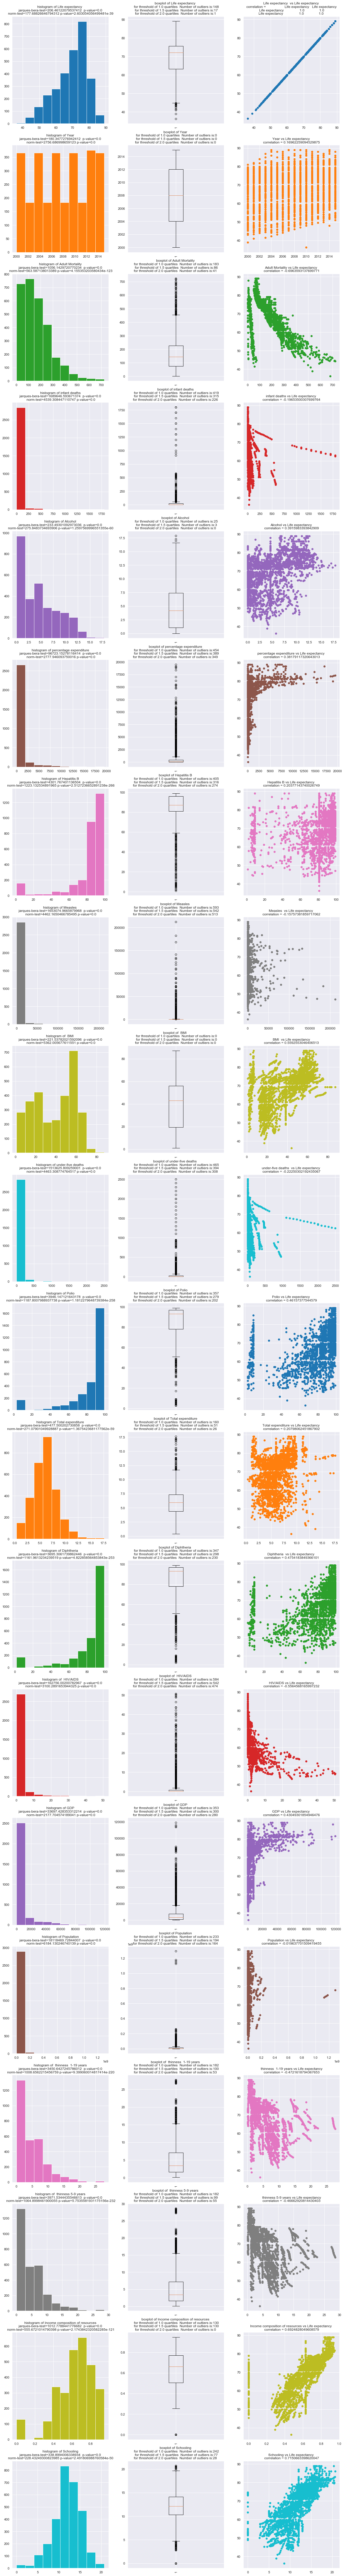

In [136]:
# create a histogram boxplot and scatter plot with life expectancy 
#along with normality test scores outliers and coorelation 

#import necessary functions 
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest

columnlist = ['Life expectancy ', 'Year','Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

#set parameters for plotting layout figuresize and colors 
plt.tight_layout()
sns.set(rc={ 'figure.facecolor':'white'})

plt.figure(figsize=(20,160))
colorlist = ['tab:blue','tab:orange','tab:green','tab:red',
             'tab:purple','tab:brown','tab:pink',
             'tab:grey','tab:olive','tab:cyan']

#initiate values to be used in for loop
p=0
n=0
for i, column in enumerate (columnlist,1):

    p=i*3
    c = colorlist[n]
    if n > len(colorlist)-2:
        n=0
    else:
        n+=1
        
    jb_stats = jarque_bera(lifexp_df[column])
    norm_stats = normaltest(lifexp_df[column])
    corr_stat = lifexp_df[['Life expectancy ',column]].corr()
    
    q75, q25 = np.percentile(lifexp_df[column], [75 ,25])
    iqr = q75 - q25
    outliers = []
    for threshold in np.arange(1,3,0.5):
        
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
        
        outliers.append(threshold)
        outliers.append(len((np.where((lifexp_df[column] > max_val) 
                          | (lifexp_df[column] < min_val))[0])))
        #return(outliers)

    
    plt.subplot(len(columnlist),3,p-2)
    plt.hist(lifexp_df[column],color = c)
    plt.title('histogram of {}\n jarques-bera-test={}  p-value={} \n norm-test={} p-value={}'.format(column,jb_stats[0],jb_stats[1], norm_stats[0], norm_stats[1]))
    
    plt.subplot(len(columnlist),3,p-1)
    plt.boxplot(lifexp_df[column])
    plt.xticks(rotation='vertical')
    plt.title("boxplot of {} \n for threshold of {} quartiles  Number of outliers is:{}\n for threshold of {} quartiles  Number of outliers is:{}\nfor threshold of {} quartiles  Number of outliers is:{} ".format(
        column,outliers[0],outliers[1],outliers[2],outliers[3],outliers[4],outliers[5]))
    
    plt.subplot(len(columnlist),3,p)
    plt.scatter(lifexp_df[column],y = lifexp_df['Life expectancy '],color = c)
    plt.title("{} vs Life expectancy \n correlation = {} ".format(column,corr_stat.loc['Life expectancy ',column]))
    
plt.show()    




Several columns stand out as variables that might be useful. 
Schooling and income composition seem to show strong correlation to life expectancy. Both apppear to have linear relationships to life expectancy. 

Population is off by a few billion, several variables are also showing some strange echo like patterns that are likely the result of clerical errors relating to mistakes in order of magnitude or units of measurment. This could have arisen from marking percentages down as an out of ten variable, or as a percentage in cases of counts per thousand. Nany of these extremely low and high numbers would not be the case espcially for Polio, Diptheria, BMI, hepatitis B, and possibly Adult mortality even in the best and worst of circumstances.  This could be resolved by transforming the datapoints below a certain threshold. However, This will likely be difficult to fix with population, and infant deaths and deaths under five  due to overlap with data of a proper magnitude. 


- Variables that may need winsorization or outlier removal
    - Adult Mortality
    - Hep B
    - Polio 
    - Total Expenditure
    - Diptheria
    - income composition of resources 
    - Schooling 

- Variables that may need transformation 
    * sqrt
         - Adult Mortality
         - Alchol
         - thinness
    * Log
        - GDP
        - Population
        - Infant Deaths
        - Percentage Expenditure
        - Measles
        - Under Five Deaths
        - HIV/AIDS
    * Other
        - Year
        - Hep B
        - BMI
        - Polio 
        - Diptheria

after removal of outliers and possibly a monotonic transforation we may see a stronger correlation with some of the weakly correlated variables 




## Data Cleaning Part 2  

In [137]:
#please only run once
# to correct for tabulation errors in Polio Diptheria Hepatitis B and BMI select data below 10% and multiply by ten. 
lifexp_df['Polio'] = lifexp_df['Polio'].apply(lambda x: x*10  if x< 10 else x)
lifexp_df['Diphtheria '] = lifexp_df['Diphtheria '].apply(lambda x: x*10  if x< 10 else x)
lifexp_df['Hepatitis B'] = lifexp_df['Hepatitis B'].apply(lambda x: x*10  if x< 10 else x)
lifexp_df[' BMI '] = lifexp_df[' BMI '].apply(lambda x: x*10  if x< 10 else x)

lifexp_df['Adult Mortality'] = lifexp_df['Adult Mortality'].apply(lambda x: x*10  if x < 50 else x)
lifexp_df['infant deaths'] = lifexp_df['infant deaths'].apply(lambda x: x/10  if x> 750 else x)
lifexp_df['under-five deaths '] = lifexp_df['under-five deaths '].apply(lambda x: x/10  if x> 1000 else x)


After Correcting the clerical errors in order of magnitude several variables have a stronger correlation with life expectancy and have fewer outliers

## Data Cleaning Outliers and transformaions 

{'whiskers': [<matplotlib.lines.Line2D at 0x1a27775810>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2779a110>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2779ba90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2779ab50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2779bc10>],
 'means': []}

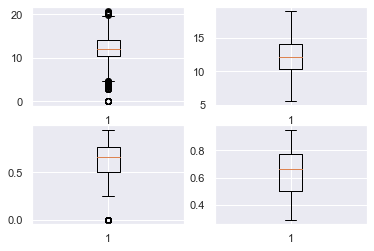

In [138]:
# Winsorize variables 

from scipy.stats.mstats import winsorize


lifexp_df['winsor_Schooling'] = winsorize(lifexp_df['Schooling'], (0.04, 0.01))

lifexp_df['winsor_Income composition of resources'] = winsorize(lifexp_df['Income composition of resources'], (0.05, 0))
plt.subplot(2,2,1)
plt.boxplot(lifexp_df['Schooling'])

plt.subplot(2,2,2)
plt.boxplot(lifexp_df['winsor_Schooling'])

plt.subplot(2,2,3)
plt.boxplot(lifexp_df['Income composition of resources'])

plt.subplot(2,2,4)
plt.boxplot(lifexp_df['winsor_Income composition of resources'])



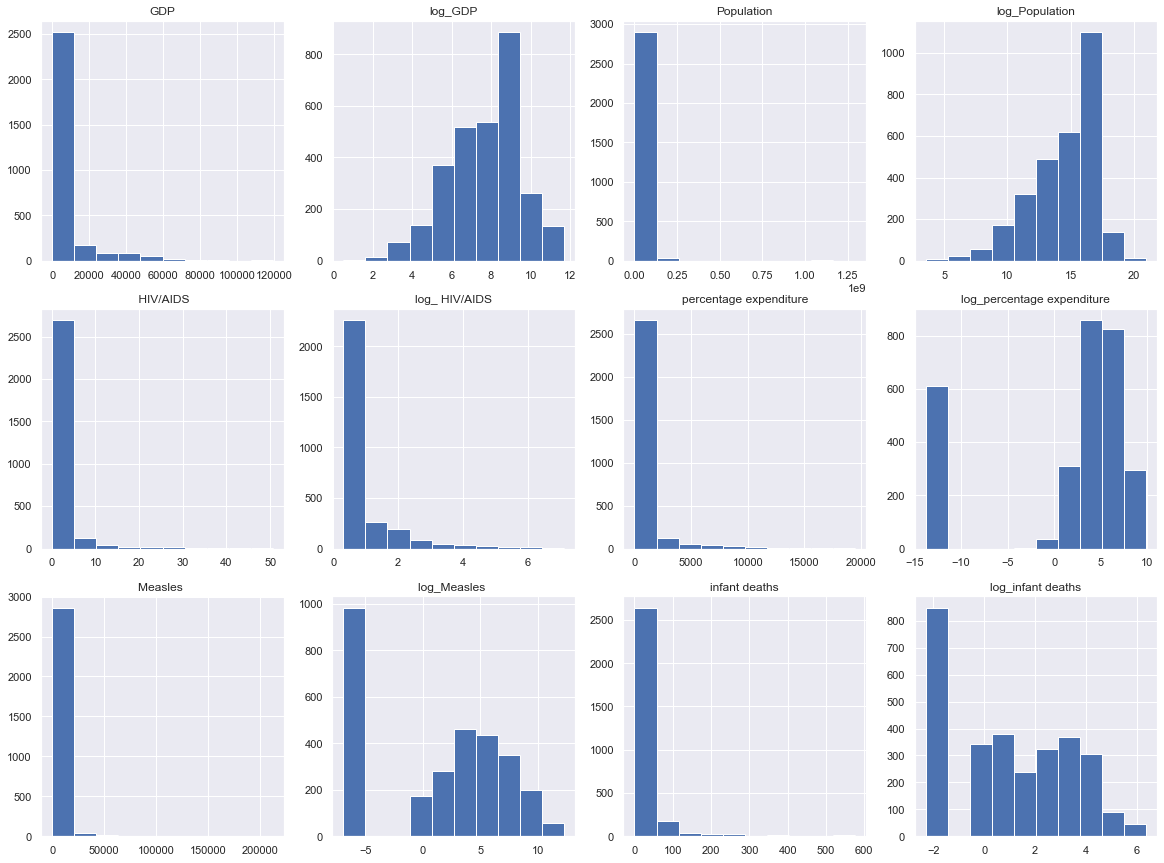

In [139]:
#log transform data with skewed distribution

log_transform_list  = ['GDP', 'Population' ,' HIV/AIDS', 'percentage expenditure', 'Measles ', 'infant deaths']


lifexp_df['log_GDP'] = np.log(lifexp_df['GDP'])

lifexp_df['log_Population'] = np.log(lifexp_df['Population'])

lifexp_df['log_ HIV/AIDS'] = np.sqrt(lifexp_df[' HIV/AIDS'])#+0.0001)

lifexp_df['log_percentage expenditure'] = np.log(lifexp_df['percentage expenditure']+0.000001)

lifexp_df['log_Measles '] = np.log(lifexp_df['Measles ']+0.001)

lifexp_df['log_infant deaths'] = np.log(lifexp_df['infant deaths']+0.1)

lifexp_df['log_under-five deaths '] = np.log(lifexp_df['under-five deaths ']+0.1)



#plt.tight_layout()
plt.figure(figsize=(20,15))
    
for i, column in enumerate (log_transform_list,1):
    p=i*2
   
    plt.subplot(len(log_transform_list)/2,4,p-1)
    plt.hist(lifexp_df[column])
    #plt.xticks(rotation='horizontal')
    plt.title(column)
    
    plt.subplot(len(log_transform_list)/2,4,p)
    plt.hist(lifexp_df['log_{}'.format(column)])
    plt.title('log_{}'.format(column))
   

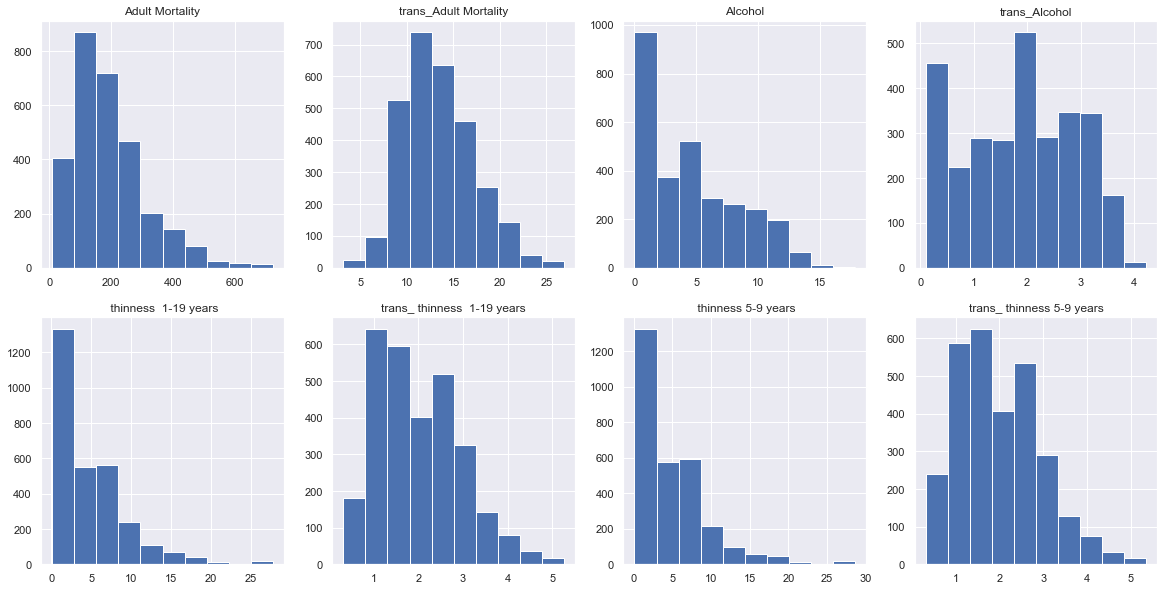

In [140]:
transform_list =['Adult Mortality','Alcohol',' thinness  1-19 years',' thinness 5-9 years']

## Sqrt(x transformations)
lifexp_df['trans_Adult Mortality'] = np.sqrt(lifexp_df['Adult Mortality'])

lifexp_df['trans_Alcohol'] = np.sqrt(lifexp_df['Alcohol'])

lifexp_df['trans_ thinness  1-19 years'] = np.sqrt(lifexp_df[' thinness  1-19 years'])

lifexp_df['trans_ thinness 5-9 years'] = np.sqrt(lifexp_df[' thinness 5-9 years'])


#plt.tight_layout()
plt.figure(figsize=(20,10))
    
for i, column in enumerate (transform_list,1):
    p=i*2
   
    plt.subplot(math.ceil(len(transform_list)/2),4,p-1)
    plt.hist(lifexp_df[column])
    #plt.xticks(rotation='horizontal')
    plt.title(column)
   
    plt.subplot(math.ceil(len(transform_list)/2),4,p)
    plt.hist(lifexp_df['trans_{}'.format(column)])
    plt.title('trans_{}'.format(column))
   

# Finding Suitible features 

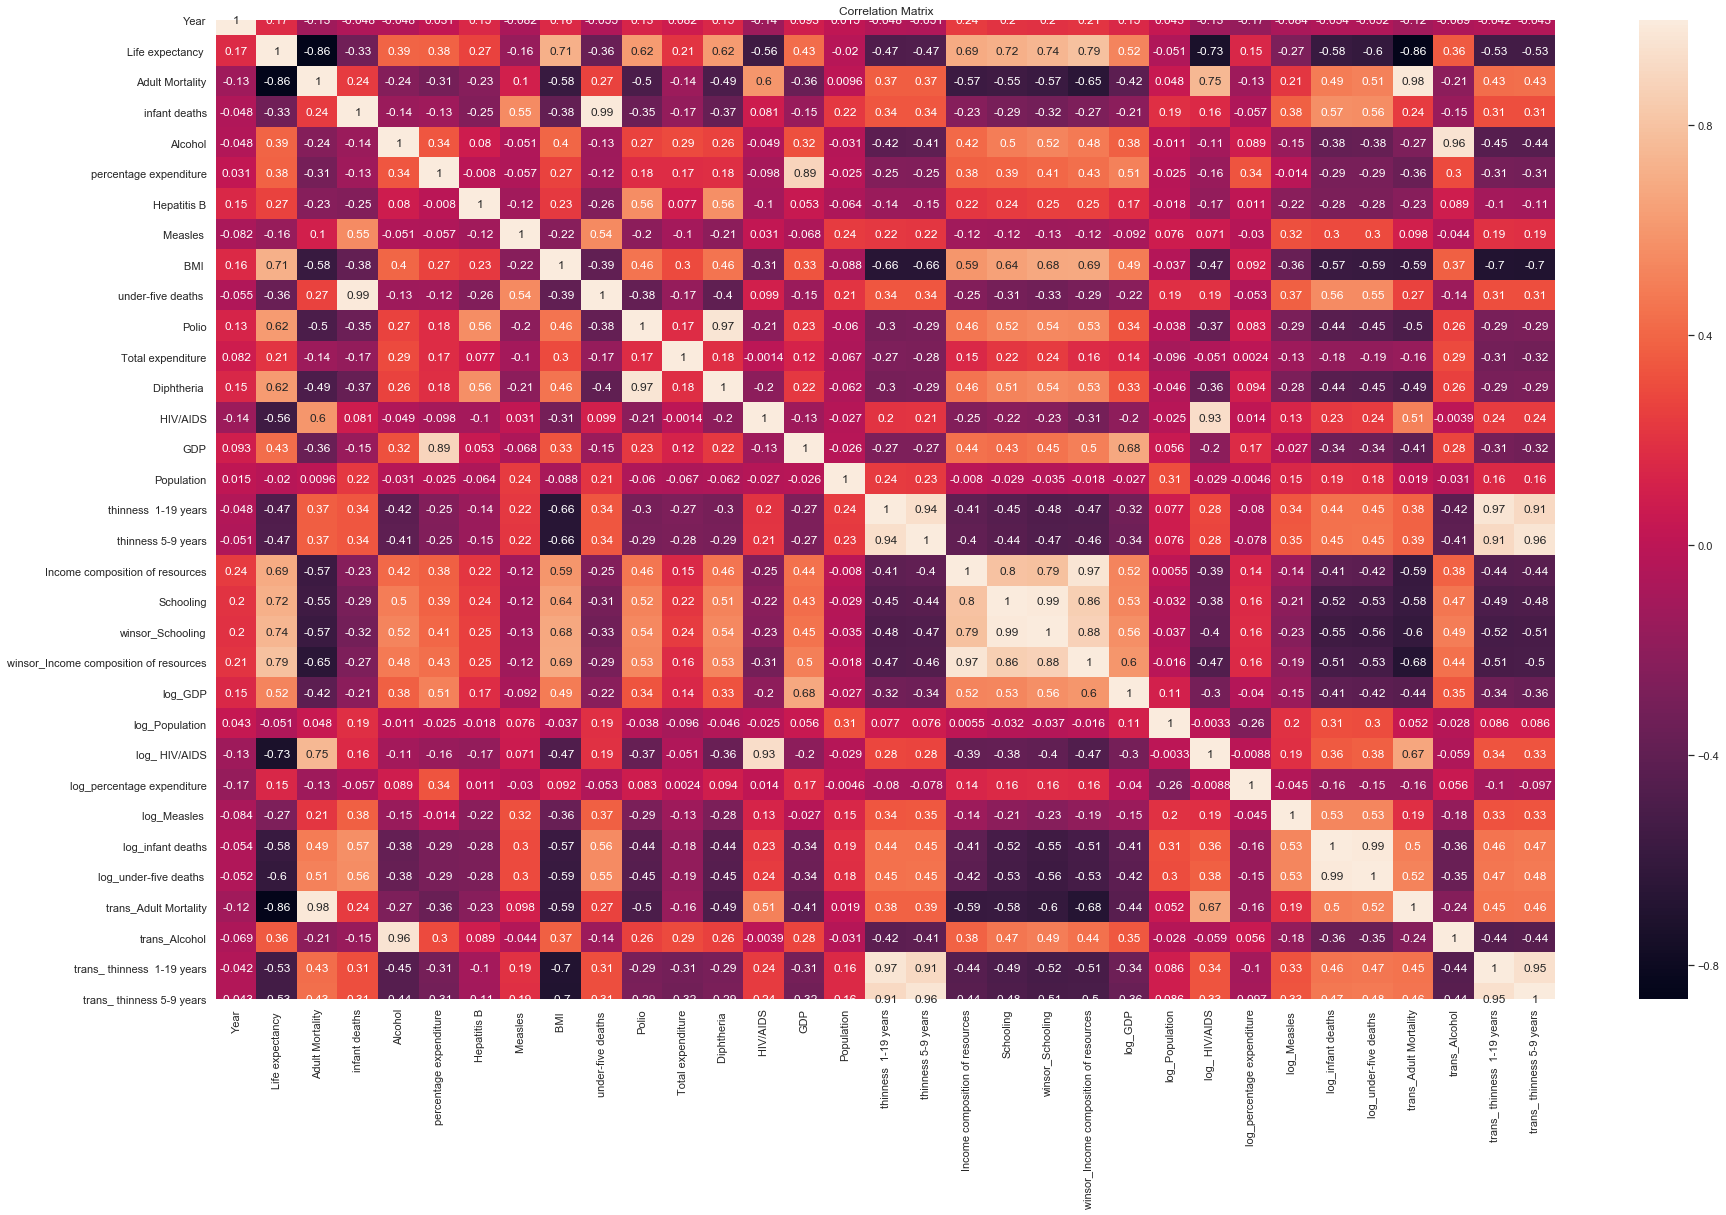

In [141]:
plt.figure(figsize=(30,18))
sns.set(rc={ 'figure.facecolor':'tab:gray'})

heat_corr=lifexp_df.corr() 
sns.heatmap(heat_corr, annot=True) 
plt.title("Correlation Matrix")
plt.show()


So far, there are several variables that would make useful features for the target variable of Life Expectancy.  The winsorized 'Income Composition of Resources' with a correlation of (0.79), and Adult Mortality with a negative correlation of (-0.86). Many other features show moderate correlation between 0.75 and 0.2 might be useful as part of a Principle Component Feature. 




## Variable Removal

Highly correlated variables will have the less correlated variables excluded from PCA. Schooling is more correlated with income composition of resources.  Percent expenditure is also more highly correlated with GDP than the target variable. Both age groups of thinness are highly correlated with each other, I will use the 5-9 age range for PCA.  Of the transformed data most transformed plots have a higher correlation with the target variable then their original counterparts.Howver, several transformed variables perform worse, particularly the transformed alchohol, thinness and ones related to disease. 

## Principle Component Analysis 

In [142]:
lifexp_df = lifexp_df.dropna()

PCA_lifexp_df = lifexp_df[[ 'Alcohol', 'Hepatitis B', ' BMI ',  'Polio', 'Total expenditure',
                           'Diphtheria ', 'GDP', 'Population',' thinness 5-9 years',
                           'winsor_Income composition of resources', 'log_GDP', 'log_Population',
                           'log_ HIV/AIDS', 'log_percentage expenditure', 'log_Measles ',
                           'log_under-five deaths ', 'Adult Mortality']]


PCA_lifexp_df.head()

,Alcohol,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 5-9 years,winsor_Income composition of resources,log_GDP,log_Population,log_ HIV/AIDS,log_percentage expenditure,log_Measles,log_under-five deaths,Adult Mortality
0,0.01,65.0,19.1,60.0,8.16,65.0,584.259210,33736494.0,17.3,0.479,6.370345,17.334091,0.316228,4.266611,7.050990,4.420045,263.0
1,0.01,62.0,18.6,58.0,8.18,62.0,612.696514,327582.0,17.5,0.476,6.417870,12.699494,0.316228,4.297606,6.198481,4.455509,271.0
2,0.01,64.0,18.1,62.0,8.13,64.0,631.744976,31731688.0,17.7,0.470,6.448486,17.272826,0.316228,4.293458,6.063788,4.489759,268.0
3,0.01,67.0,17.6,67.0,8.52,67.0,669.959000,3696958.0,18.0,0.463,6.507217,15.123021,0.316228,4.359068,7.932721,4.533674,272.0
4,0.01,68.0,17.2,68.0,7.87,68.0,63.537231,2978599.0,18.2,0.454,4.151626,14.906964,0.316228,1.959688,8.010692,4.575741,275.0


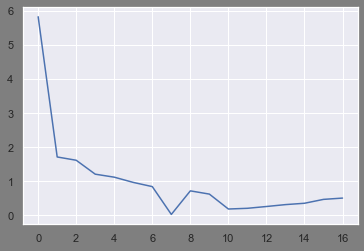

[5.82241756 1.71447552 1.61805357 1.21036068 1.12244705 0.96913567
 0.84612237 0.03154237 0.72169048 0.62668203 0.18968003 0.2107367
 0.26326428 0.3188007  0.35826098 0.47214452 0.50997372]


In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(PCA_lifexp_df)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)

# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    
# print scree plot
plt.plot(eig_val_cov)

plt.show()

print(eig_val_cov)

In [144]:
sklearn_pca = PCA(n_components=7)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)


The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.34237858 0.10081717 0.09514723 0.07117345 0.06600382 0.05698858
 0.04975496]


Only about 34% of the Variance is explained by the first principle component. 

In [145]:
for n in range(5):
    lifexp_df['PC{}'.format(n+1)]= Y_sklearn[:, n]


lifexp_df[['PC1','PC2','PC3','PC4','PC5','Life expectancy ','Adult Mortality' ]].corr()



,PC1,PC2,PC3,PC4,PC5,Life expectancy,Adult Mortality
PC1,1.000000e+00,3.914734e-17,2.330125e-17,1.685966e-17,1.774406e-17,-0.872316,0.755846
PC2,3.914734e-17,1.000000e+00,-1.997139e-16,-1.019732e-16,-7.425475e-17,0.137183,-0.144447
PC3,2.330125e-17,-1.997139e-16,1.000000e+00,-3.568250e-16,-1.819018e-16,0.075329,-0.118796
PC4,1.685966e-17,-1.019732e-16,-3.568250e-16,1.000000e+00,6.382503e-17,-0.232660,0.387373
PC5,1.774406e-17,-7.425475e-17,-1.819018e-16,6.382503e-17,1.000000e+00,-0.119654,0.222261
Life expectancy,-8.723164e-01,1.371832e-01,7.532945e-02,-2.326601e-01,-1.196536e-01,1.000000,-0.863656
Adult Mortality,7.558456e-01,-1.444472e-01,-1.187965e-01,3.873728e-01,2.222607e-01,-0.863656,1.000000


## Final Features 

Our first feature will be 'Principle Component 1' with a correlation of (-.8699), next up would be 'Adult Mortality' with a correlation of (-0.856) then 'winsorized income composition of resources' with(0.79), 'vaccination rates', BMI, 'Log transformed 5-9 deaths', and 'Log transfomred HIV/AIDS' may also prove useful but show only moderate correlation. Many of these statistics might show higher correlation if data collection methods are standardized.  

In [146]:
lifexp_df['PC1'].describe()

count    2.938000e+03
mean     1.511536e-18
std      2.412969e+00
min     -5.974582e+00
25%     -1.827553e+00
50%     -6.115556e-01
75%      2.011068e+00
max      6.688520e+00
Name: PC1, dtype: float64

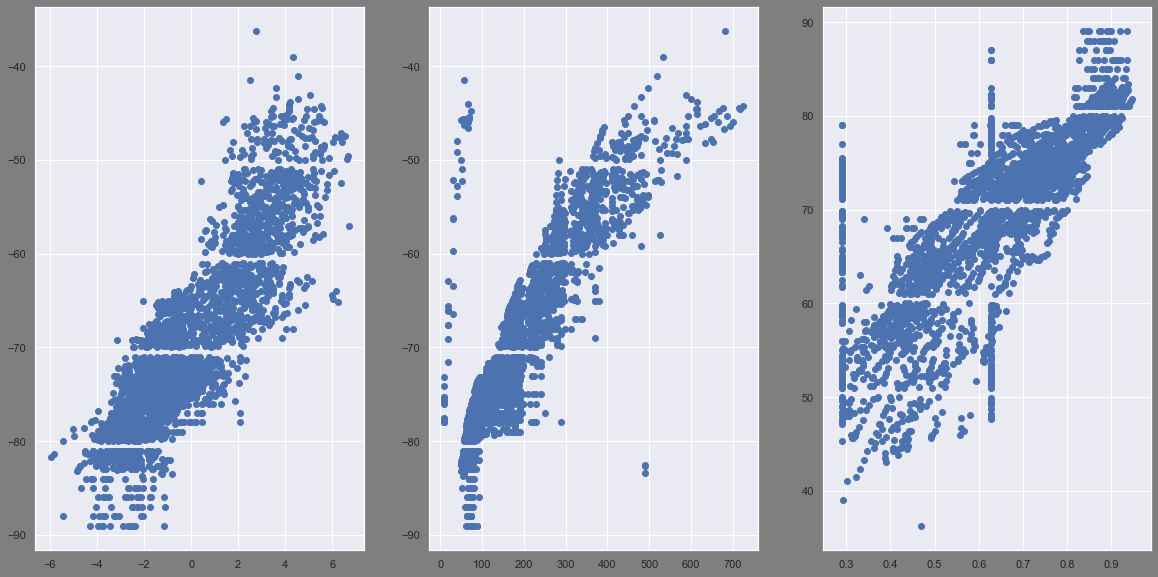

In [150]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.scatter(lifexp_df['PC1'],-lifexp_df['Life expectancy '])
 
plt.subplot(1,3,2) 
plt.scatter(lifexp_df['Adult Mortality'],-lifexp_df['Life expectancy '])
        
plt.subplot(1,3,3)
plt.scatter(lifexp_df['winsor_Income composition of resources'],lifexp_df['Life expectancy '])
        
        